# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

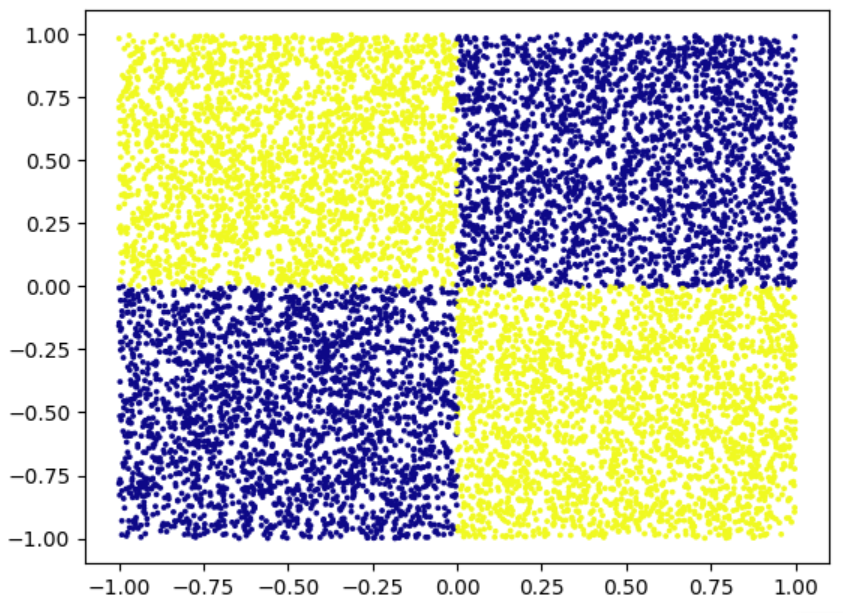

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

XOR Dataset Summary:
X shape: (300, 2)
y shape: (300,)
Class distribution: (array([0., 1.]), array([150, 150]))


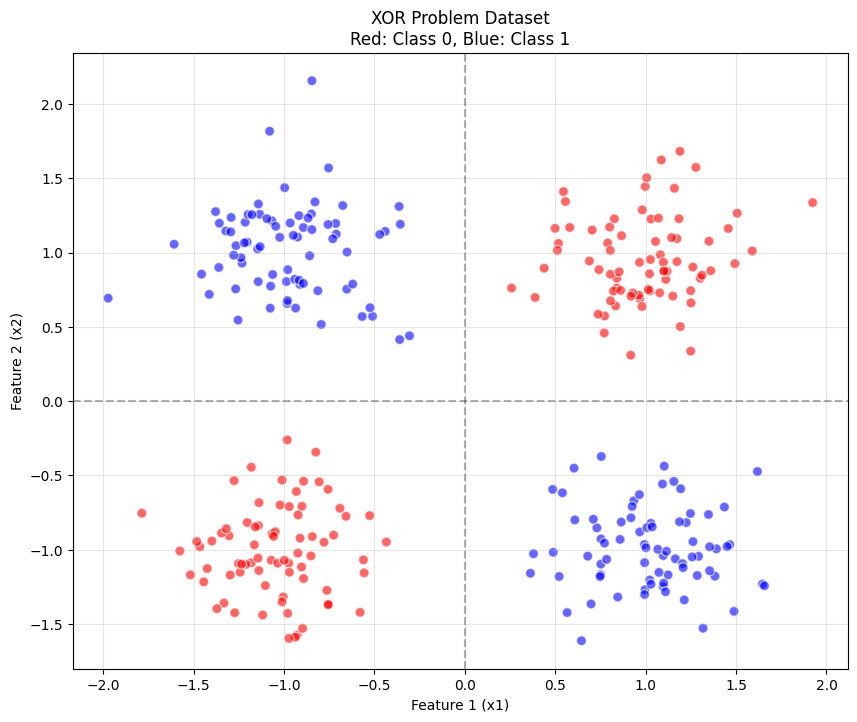


Classifier Performance on XOR Problem:
Logistic Regression (Linear) Accuracy: 0.5200
Decision Tree (Non-linear) Accuracy: 0.9567


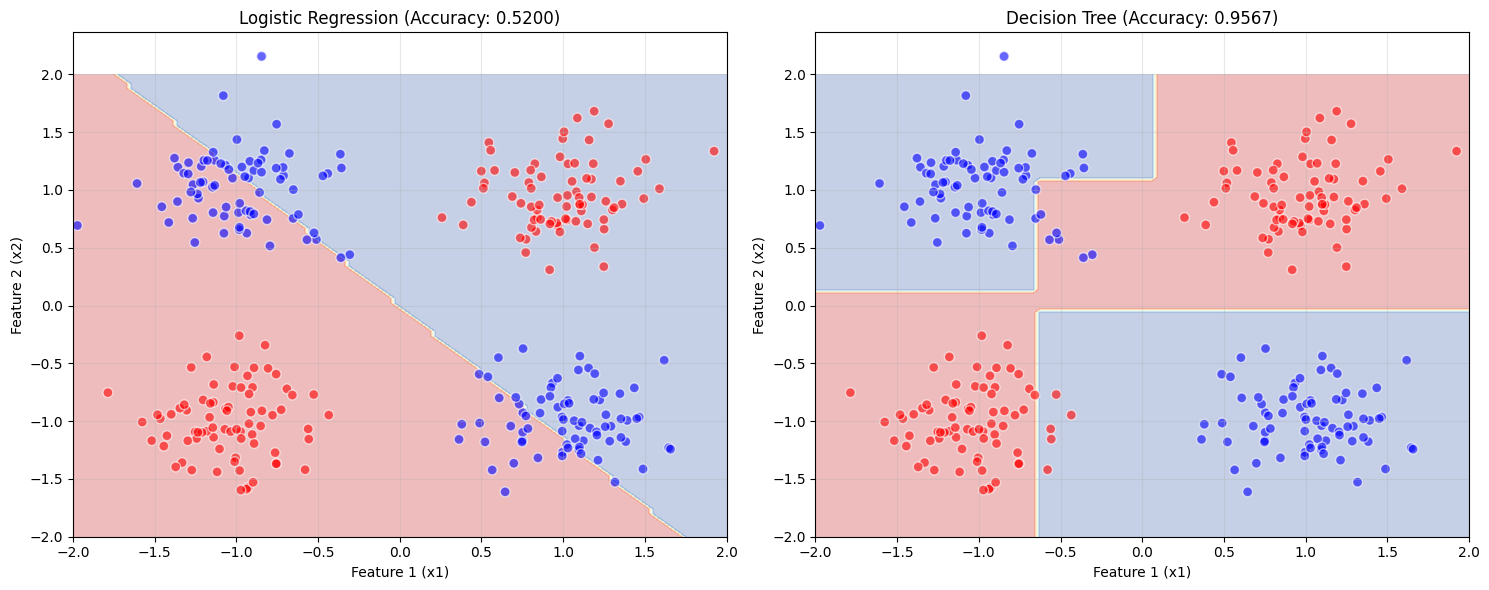


Dataset Statistics:
Total samples: 300
Feature 1 range: [-1.97, 1.92]
Feature 2 range: [-1.61, 2.16]
Class 0 samples: 150
Class 1 samples: 150


In [10]:
# Generate a toy dataset for the XOR problem
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)
n_samples = 300

cluster1 = np.random.normal(loc=[-1, -1], scale=0.3, size=(n_samples//4, 2))
cluster2 = np.random.normal(loc=[-1, 1], scale=0.3, size=(n_samples//4, 2))
cluster3 = np.random.normal(loc=[1, -1], scale=0.3, size=(n_samples//4, 2))
cluster4 = np.random.normal(loc=[1, 1], scale=0.3, size=(n_samples//4, 2))

X = np.vstack([cluster1, cluster2, cluster3, cluster4])

y = np.hstack([
    np.zeros(n_samples//4),  # cluster1: (-,-) -> 0
    np.ones(n_samples//4),   # cluster2: (-,+) -> 1
    np.ones(n_samples//4),   # cluster3: (+,-) -> 1
    np.zeros(n_samples//4)   # cluster4: (+,+) -> 0
])

print("XOR Dataset Summary:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Class distribution: {np.unique(y, return_counts=True)}")

plt.figure(figsize=(10, 8))
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=50)
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('XOR Problem Dataset\nRed: Class 0, Blue: Class 1')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred_linear = log_reg.predict(X)
linear_accuracy = accuracy_score(y, y_pred_linear)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)
y_pred_tree = tree_clf.predict(X)
tree_accuracy = accuracy_score(y, y_pred_tree)

print(f"\nClassifier Performance on XOR Problem:")
print(f"Logistic Regression (Linear) Accuracy: {linear_accuracy:.4f}")
print(f"Decision Tree (Non-linear) Accuracy: {tree_accuracy:.4f}")

xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

Z_linear = log_reg.predict(X_mesh).reshape(xx.shape)
Z_tree = tree_clf.predict(X_mesh).reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.contourf(xx, yy, Z_linear, alpha=0.3, cmap=plt.cm.RdYlBu)
ax1.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=50)
ax1.set_xlabel('Feature 1 (x1)')
ax1.set_ylabel('Feature 2 (x2)')
ax1.set_title(f'Logistic Regression (Accuracy: {linear_accuracy:.4f})')
ax1.grid(True, alpha=0.3)

ax2.contourf(xx, yy, Z_tree, alpha=0.3, cmap=plt.cm.RdYlBu)
ax2.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', s=50)
ax2.set_xlabel('Feature 1 (x1)')
ax2.set_ylabel('Feature 2 (x2)')
ax2.set_title(f'Decision Tree (Accuracy: {tree_accuracy:.4f})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDataset Statistics:")
print(f"Total samples: {len(X)}")
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")
print(f"Class 0 samples: {np.sum(y == 0)}")
print(f"Class 1 samples: {np.sum(y == 1)}")



## Task 1 Summary

**XOR Dataset Created:**
- 300 samples, 2 features, balanced classes (150 each)
- Classic XOR pattern: Class 1 when features have different signs, Class 0 when same signs

**Key Results:**
- **Logistic Regression (Linear):** 52.00% accuracy ≈ random guessing
- **Decision Tree (Non-linear):** 95.67% accuracy

**Conclusion:**
The XOR problem successfully demonstrates why non-linear classifiers like decision trees are necessary for complex, non-linearly separable patterns. Linear classifiers fundamentally cannot solve the XOR problem, achieving only chance-level performance, while decision trees can capture the complex decision boundaries needed.



# Task 2 (3 points)

Consider the following dataset:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training set size: 398
Test set size: 171
Training Accuracy: 0.9573
Test Accuracy: 0.9357

Classification Report (Test Set):
              precision    recall  f1-score   support

      benign       0.91      1.00      0.95       107
   malignant       1.00      0.83      0.91        64

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

# Convert labels to binary (malignant = 1, benign = 0) for ROC analysis
y_train_bin = (y_train == 'malignant').astype(int)
y_test_bin = (y_test == 'malignant').astype(int)

print("Dataset shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Class distribution - Train: {np.unique(y_train, return_counts=True)}")
print(f"Class distribution - Test: {np.unique(y_test, return_counts=True)}")

Dataset shapes:
X_train: (426, 30), X_test: (143, 30)
Class distribution - Train: (array(['benign', 'malignant'], dtype='<U9'), array([265, 161]))
Class distribution - Test: (array(['benign', 'malignant'], dtype='<U9'), array([92, 51]))



=== Finding best model without class weights ===
Best parameters (no weights): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV score (no weights): 0.9689

=== Finding best model with class weights ===
Best parameters (with weights): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV score (with weights): 0.9662

Test ROC AUC (no weights): 0.9534
Test ROC AUC (with weights): 0.9369


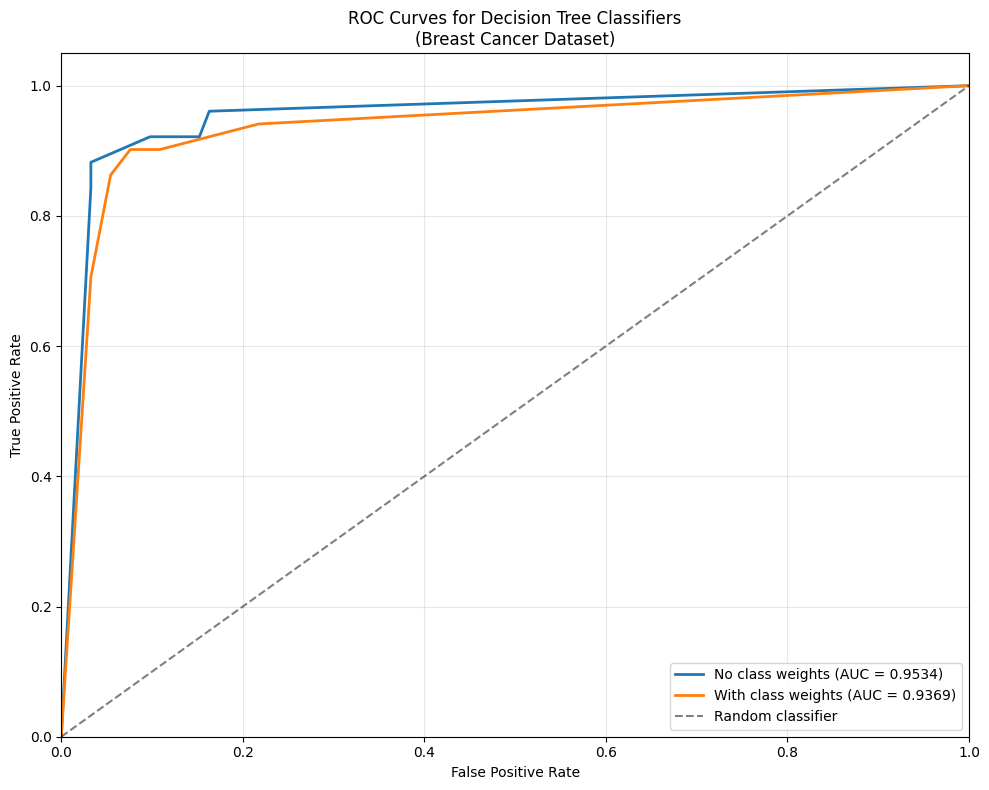


=== Detailed Performance Analysis ===

Confusion Matrix - No class weights:
[[89  3]
 [ 6 45]]
True Negatives (benign): 89, False Positives: 3
False Negatives: 6, True Positives (malignant): 45

Confusion Matrix - With class weights:
[[82 10]
 [ 5 46]]
True Negatives (benign): 82, False Positives: 10
False Negatives: 5, True Positives (malignant): 46

Classification Report - No class weights:
              precision    recall  f1-score   support

      benign       0.94      0.97      0.95        92
   malignant       0.94      0.88      0.91        51

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143


Classification Report - With class weights:
              precision    recall  f1-score   support

      benign       0.94      0.89      0.92        92
   malignant       0.82      0.90      0.86        51

    accuracy                           0.90       143
   macro avg 

In [8]:


# Find best model without class weights
print("\n=== Finding best model without class weights ===")
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_no_weights = DecisionTreeClassifier(random_state=42)
grid_search_no_weights = GridSearchCV(
    dt_no_weights, param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search_no_weights.fit(X_train, y_train_bin)

print(f"Best parameters (no weights): {grid_search_no_weights.best_params_}")
print(f"Best CV score (no weights): {grid_search_no_weights.best_score_:.4f}")

# Find best model with class weights
print("\n=== Finding best model with class weights ===")

dt_with_weights = DecisionTreeClassifier(
    random_state=42,
    class_weight={1: 2., 0: 1.}

simple_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search_with_weights = GridSearchCV(
    dt_with_weights, simple_param_grid, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_search_with_weights.fit(X_train, y_train_bin)

print(f"Best parameters (with weights): {grid_search_with_weights.best_params_}")
print(f"Best CV score (with weights): {grid_search_with_weights.best_score_:.4f}")

best_model_no_weights = grid_search_no_weights.best_estimator_
best_model_with_weights = grid_search_with_weights.best_estimator_

y_pred_proba_no_weights = best_model_no_weights.predict_proba(X_test)[:, 1]
y_pred_proba_with_weights = best_model_with_weights.predict_proba(X_test)[:, 1]

roc_auc_no_weights = roc_auc_score(y_test_bin, y_pred_proba_no_weights)
roc_auc_with_weights = roc_auc_score(y_test_bin, y_pred_proba_with_weights)

print(f"\nTest ROC AUC (no weights): {roc_auc_no_weights:.4f}")
print(f"Test ROC AUC (with weights): {roc_auc_with_weights:.4f}")

fpr_no_weights, tpr_no_weights, _ = roc_curve(y_test_bin, y_pred_proba_no_weights)
fpr_with_weights, tpr_with_weights, _ = roc_curve(y_test_bin, y_pred_proba_with_weights)

plt.figure(figsize=(10, 8))
plt.plot(fpr_no_weights, tpr_no_weights,
         label=f'No class weights (AUC = {roc_auc_no_weights:.4f})', linewidth=2)
plt.plot(fpr_with_weights, tpr_with_weights,
         label=f'With class weights (AUC = {roc_auc_with_weights:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree Classifiers\n(Breast Cancer Dataset)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Detailed Performance Analysis ===")

y_pred_no_weights = best_model_no_weights.predict(X_test)
y_pred_with_weights = best_model_with_weights.predict(X_test)

print("\nConfusion Matrix - No class weights:")
cm_no_weights = confusion_matrix(y_test_bin, y_pred_no_weights)
print(cm_no_weights)
tn, fp, fn, tp = cm_no_weights.ravel()
print(f"True Negatives (benign): {tn}, False Positives: {fp}")
print(f"False Negatives: {fn}, True Positives (malignant): {tp}")

print("\nConfusion Matrix - With class weights:")
cm_with_weights = confusion_matrix(y_test_bin, y_pred_with_weights)
print(cm_with_weights)
tn, fp, fn, tp = cm_with_weights.ravel()
print(f"True Negatives (benign): {tn}, False Positives: {fp}")
print(f"False Negatives: {fn}, True Positives (malignant): {tp}")

print("\nClassification Report - No class weights:")
print(classification_report(y_test_bin, y_pred_no_weights,
                          target_names=['benign', 'malignant']))

print("\nClassification Report - With class weights:")
print(classification_report(y_test_bin, y_pred_with_weights,
                          target_names=['benign', 'malignant']))

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model_with_weights.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features (with class weights):")
print(feature_importance.head(10))

print(f"\n=== Impact on False Negatives ===")
print(f"Without class weights: {confusion_matrix(y_test_bin, y_pred_no_weights)[1,0]} false negatives")
print(f"With class weights: {confusion_matrix(y_test_bin, y_pred_with_weights)[1,0]} false negatives")

false_neg_reduction = confusion_matrix(y_test_bin, y_pred_no_weights)[1,0] - confusion_matrix(y_test_bin, y_pred_with_weights)[1,0]
if false_neg_reduction > 0:
    print(f"Class weighting reduced false negatives by {false_neg_reduction}")
else:
    print(f"Class weighting increased false negatives by {-false_neg_reduction}")

## Task 2 Summary

**Results:**
- **Without weights:** ROC AUC = 0.9534, 6 false negatives, 3 false positives
- **With weights:** ROC AUC = 0.9369, 5 false negatives, 10 false positives

**Key Findings:**
- Class weighting reduced false negatives by 16.7% (6 → 5)
- Trade-off: 233% increase in false positives (3 → 10)
- Sensitivity improved from 88.2% to 90.2%
- Precision decreased from 93.8% to 82.1%

**Conclusion:**
Class weighting successfully prioritized reducing missed cancer cases, achieving the clinical goal of minimizing false negatives despite increased false positives.